# 📖 [LMX Tutorial] Absolute and Relative motion (in Python)

Based on the following WMX API document:

http://download.movensys.com:8222/doc/wmx3/en/html/api/page_WMXDOC_TUTORIAL_SEC3_1_ABS_REL.html

### ⭐ Start LMX engine manually

Note that this command is required only for LMX Python notebooks.

In [1]:
!/opt/lmx/bin/lmx-start-engine

[2025-03-21 04:26:02.212][WMX3Engine]Build: Oct 16 2024:11:35:23 (v3.5.0.0)
[2025-03-21 04:26:03.117][WMX3Engine]LicenseVerify: Valid WMX3 license code is not found.
[2025-03-21 04:26:03.168][WMX3Engine]Free license running mode is applied.
[2025-03-21 04:26:03.168][WMX3Engine]WMX3Engine will stop communicating after one hour of continuous communication.
lmx engine is started!


## Import WMX library and Initialize a WMX3 API device

In [2]:
# Import WMX3 API library
from WMX3ApiPython import *
# Import WMX3 Utils library for Python Notebook
from WMX3UtilPython import *

# When all the devices are done, the WMX3 engine will also terminate.	
wmx3_api = WMX3Api()
wmx3_core_motion = CoreMotion(wmx3_api)

# Create a device.
wmx3_api.CreateDevice('/opt/lmx', DeviceType.DeviceTypeNormal, INFINITE)

# Set wmx3_api Name.
wmx3_api.SetDeviceName('device')

# Initialize WMX3 Python Utility
wmx3_log_manager = WMX3LogManager()

# Settings for Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Set the device name and start communication

In [3]:
# Set wmx3_api Name.
ret = wmx3_api.SetDeviceName('MotorControl')
if ret != ErrorCode.PyNone:
    check_errorcode("SetDeviceName", ret)
    
# Start Communication.
ret = wmx3_api.StartCommunication(INFINITE)
if ret != ErrorCode.PyNone:
    check_errorcode("StartCommunication", ret)

print(f'StartCommunication succeeded')

StartCommunication succeeded


In [4]:
# Get created device state.
ret, devInfo = wmx3_api.GetAllDevices()
if ret != ErrorCode.PyNone:
    check_errorcode("GetAllDevices", ret)
    
# Display the acquired device.
print(f'Device Id: {devInfo.GetDevices(0).id}, Name: {devInfo.GetDevices(0).name}')

Device Id: 0, Name: MotorControl


## Set servo ON ▶️

In [5]:
wmx3_core_motion.axisControl.SetServoOn(0, 1)
while True:
    # wmx3_core_motion.GetStatus(coremotion_status)
    ret, coremotion_status = wmx3_core_motion.GetStatus()
    if coremotion_status.GetAxesStatus(0).servoOn:
        break
    sleep(0.1)

## 1. Absolute position command (`StartPos`)

Refer to the following API documentation:

http://download.movensys.com:8222/doc/wmx3/en/html/api/classwmx3_api_1_1_motion.html#_CPPv4N7wmx3Api6Motion8StartPosEjP17TriggerPosCommand

In [6]:
# Create a command value.
pos_command = Motion_PosCommand()

# Set position command parameters
pos_command.axis = 0
pos_command.profile.type = ProfileType.Trapezoidal
pos_command.profile.velocity = 2000
pos_command.profile.acc = 500
pos_command.profile.dec = 500

# Execute absolute position command to 10000
pos_command.target = 10000

if not wmx3_log_manager.start_log(): 
    print("Failed to execute start_log. \n")
else:
    # Rotate the motor at the specified speed.
    err = wmx3_core_motion.motion.StartPos(pos_command)
    
    if err != ErrorCode.PyNone:
        error_string = wmx3_core_motion.ErrorToString(err)
        print("Failed to execute motion. Error=%d (%s)\n", err, error_string)
    
    # Wait for the motor to stop
    err = wmx3_core_motion.motion.Wait(0)
    
    wmx3_log_manager.stop_log()

Trying memory log channel #7
[MemoryLogger Log] Count: 8900, Overflow: 0
start_log has executed successfully.
[Received Log] Count: 8900, Overflow: 0


### 1.1 Draw the position and velocity plots for absolute motion 📈

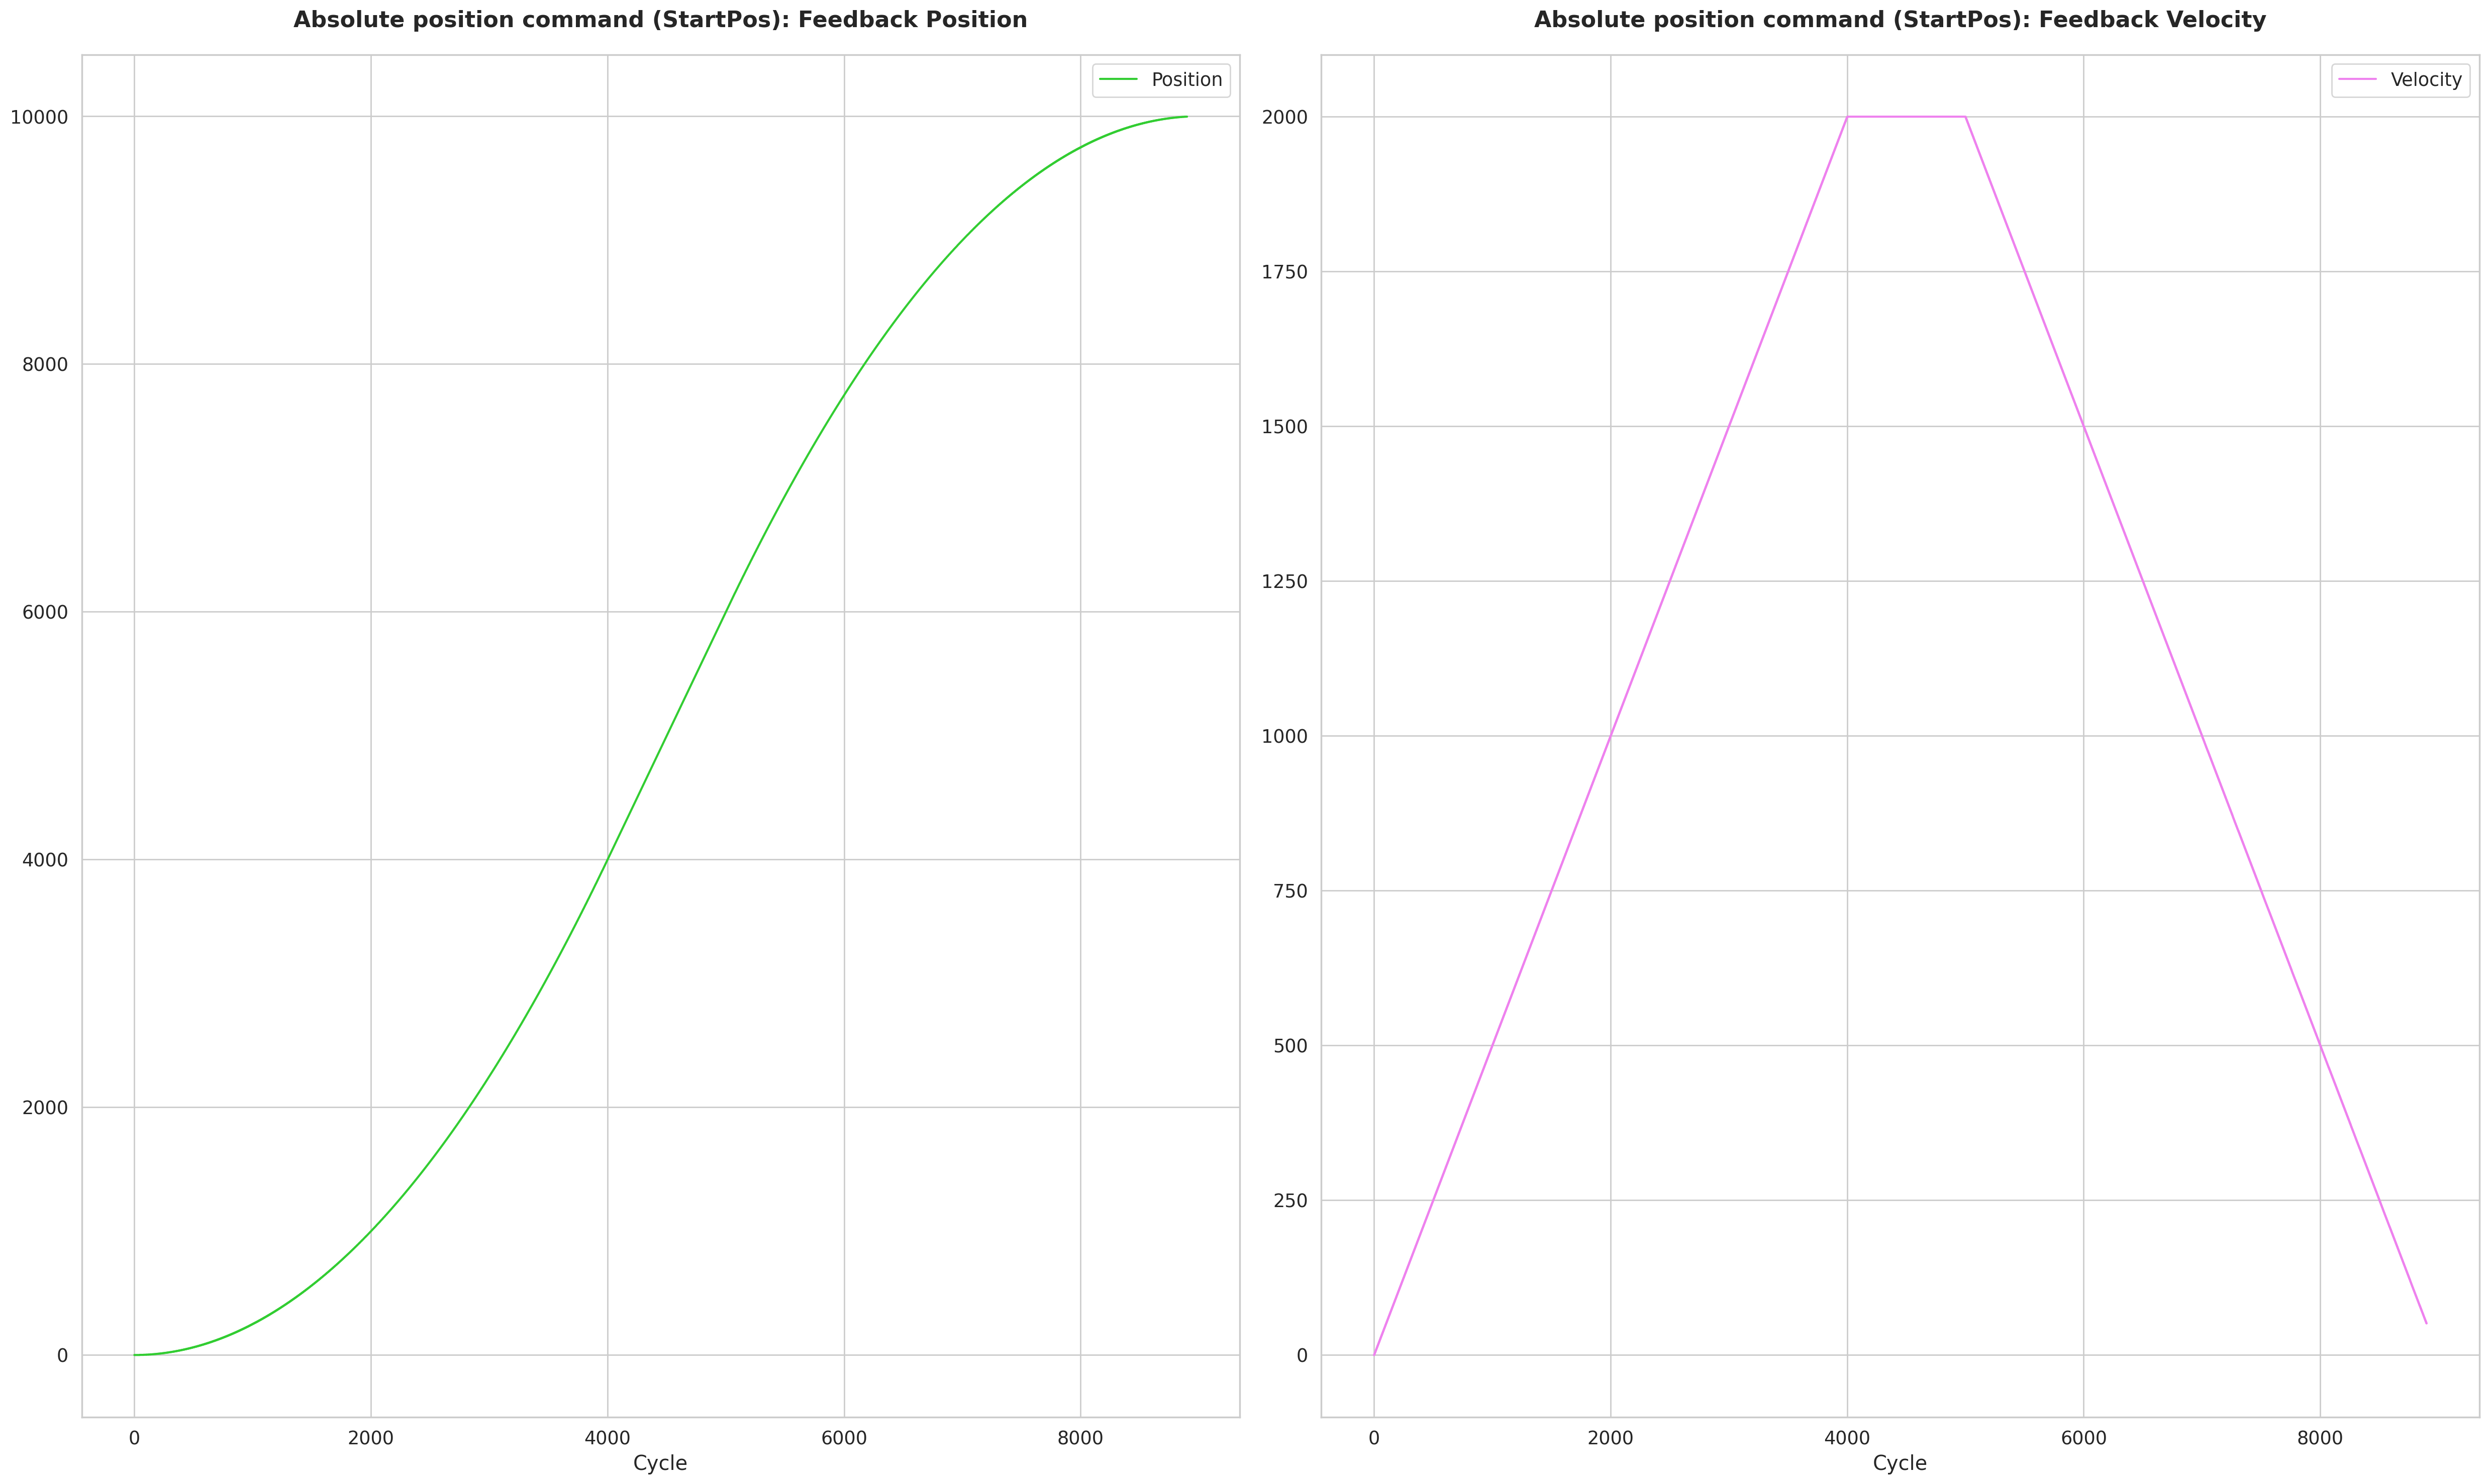

In [7]:
wmx3_log_manager.draw_plots('Absolute position command (StartPos)')

## 2. Relative position command (`StartMov`)

Refer to the following API documentation:

http://download.movensys.com:8222/doc/wmx3/en/html/api/classwmx3_api_1_1_motion.html#_CPPv4N7wmx3Api6Motion8StartMovEP10PosCommand

In [8]:
# Execute relative position command of 10000
pos_command.target = 1000
pos_command.profile.velocity = 200
pos_command.profile.acc = 50
pos_command.profile.dec = 50

if not wmx3_log_manager.start_log(): 
    print("Failed to execute start_log. \n")
else:
    err = wmx3_core_motion.motion.StartMov(pos_command)

    if err != ErrorCode.PyNone:
        error_string = wmx3_core_motion.ErrorToString(err)
        print("Failed to execute motion. Error=%d (%s)\n", err, error_string)

    # Wait for the motor to stop
    err = wmx3_core_motion.motion.Wait(0)

    wmx3_log_manager.stop_log()

Trying memory log channel #7
[MemoryLogger Log] Count: 8900, Overflow: 0
start_log has executed successfully.
[Received Log] Count: 8900, Overflow: 0


### 1.1 Draw the position and velocity plots for relative motion 📈

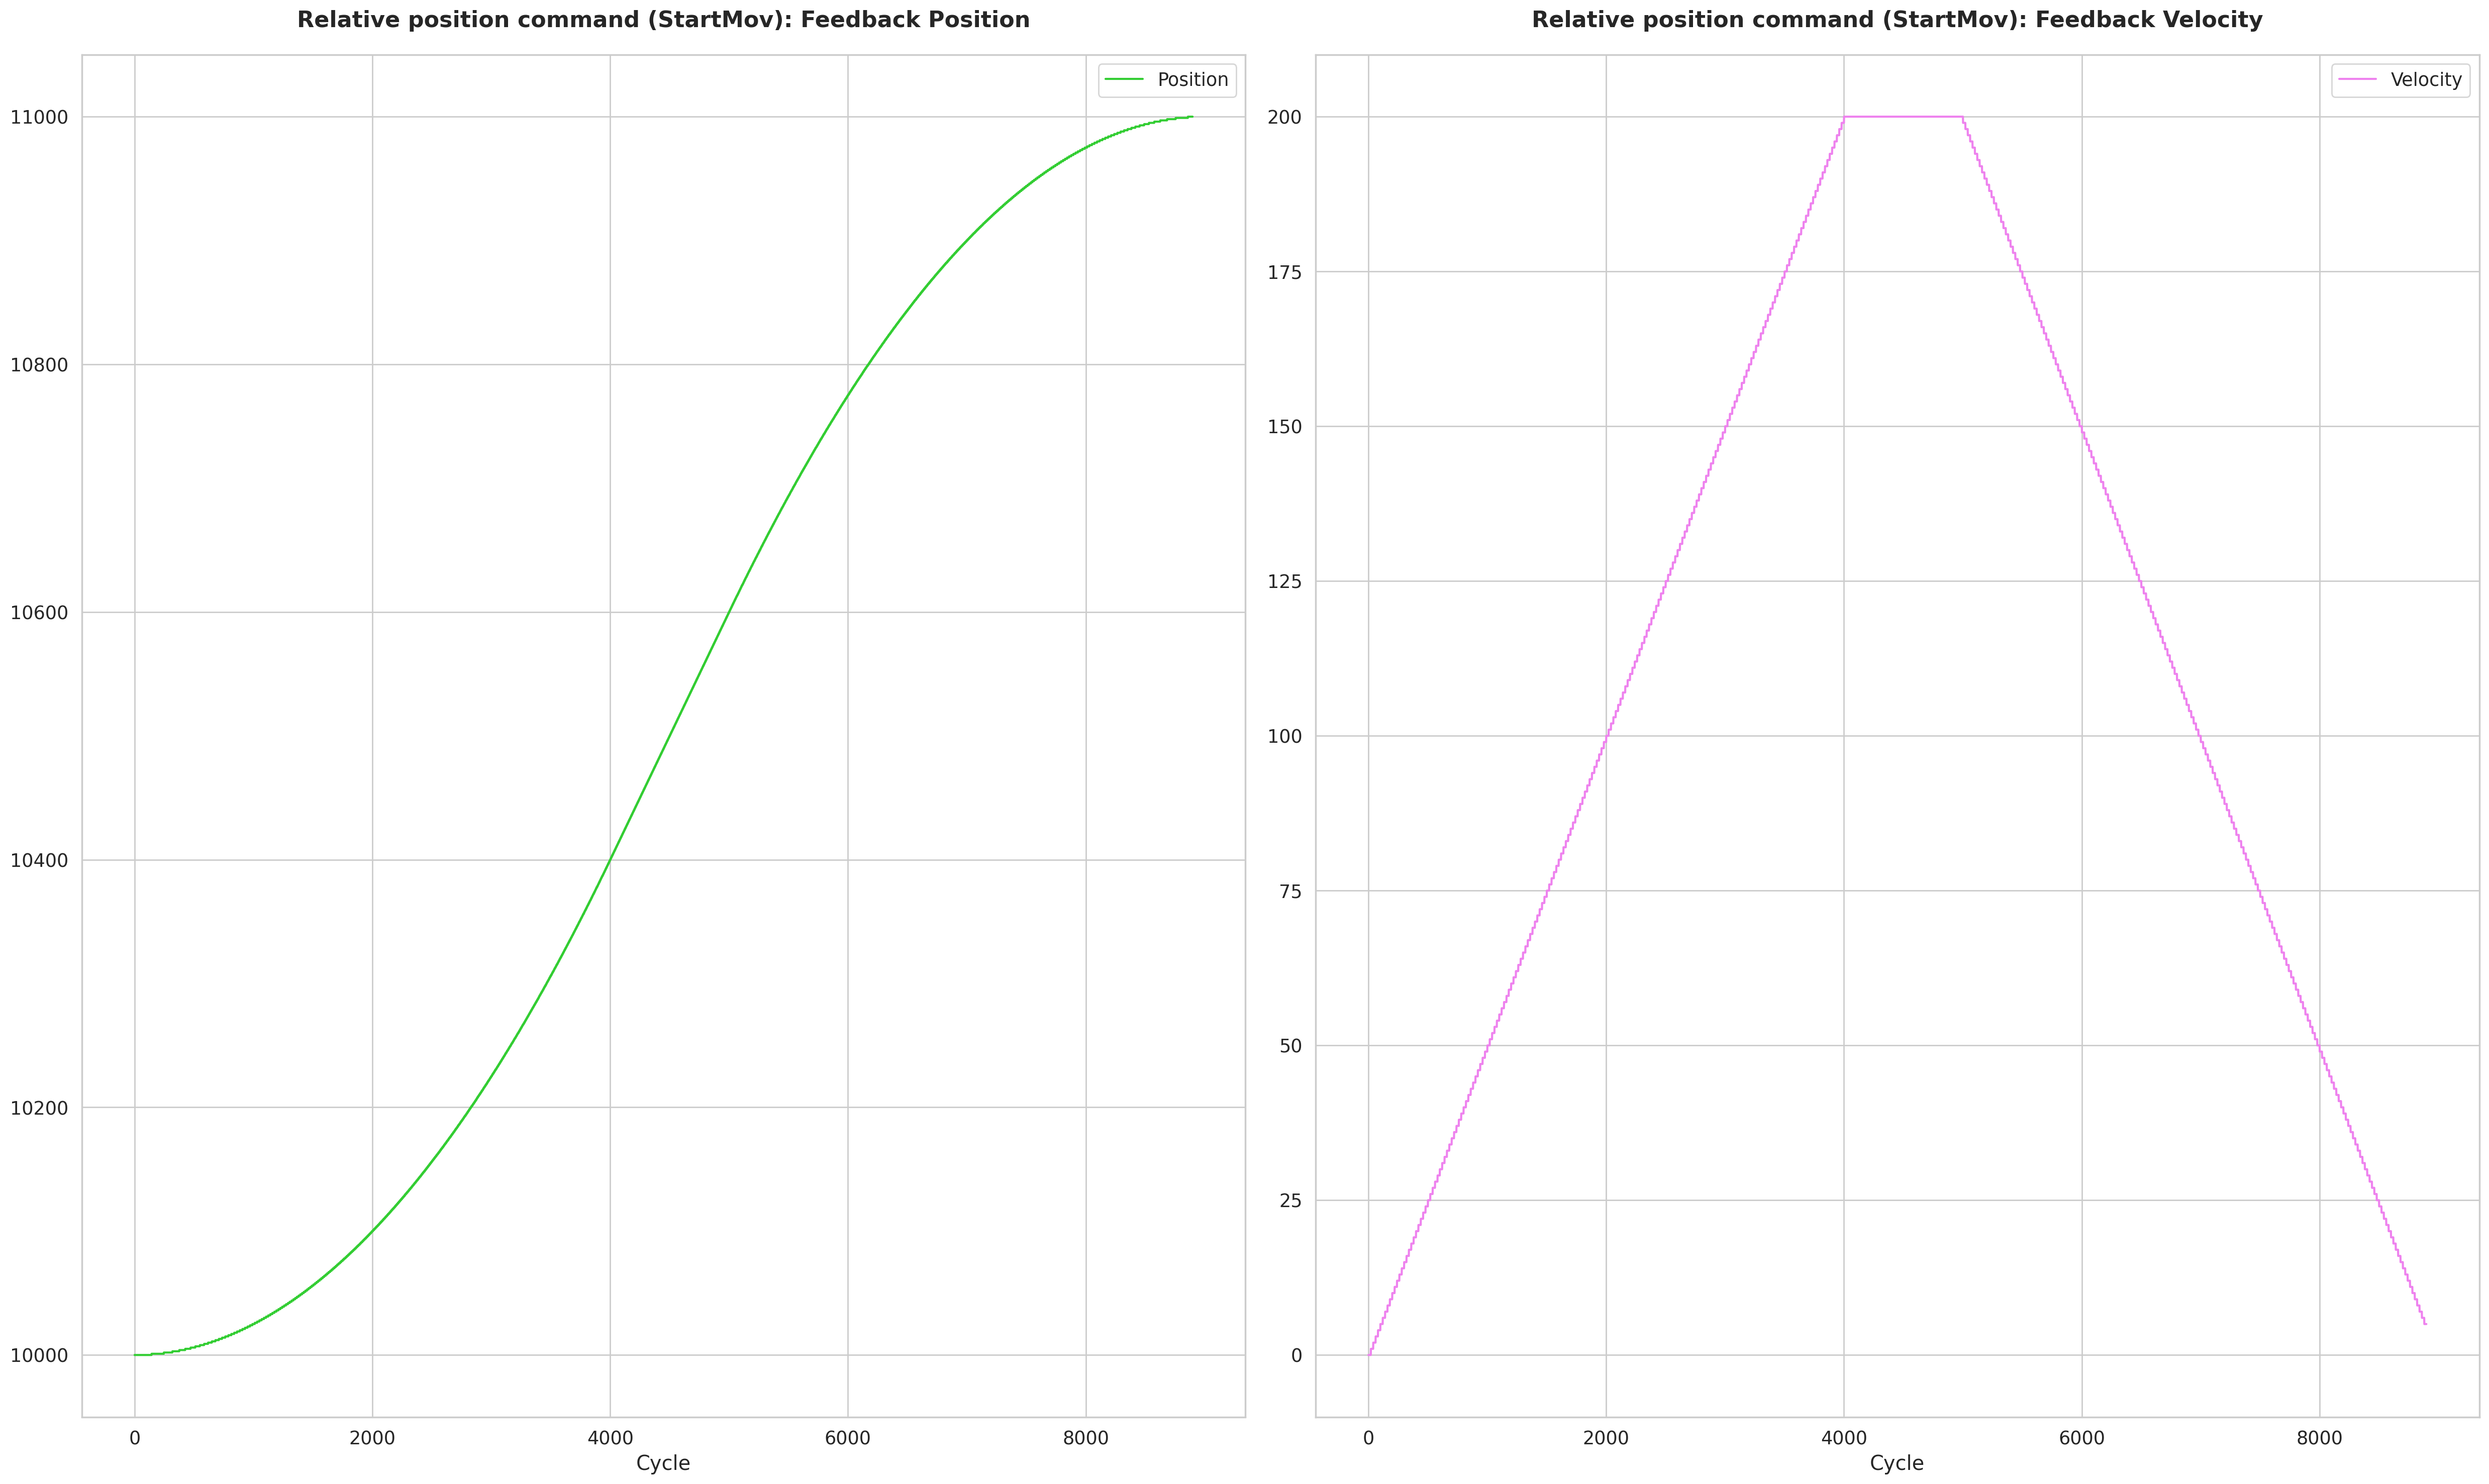

In [9]:
wmx3_log_manager.draw_plots('Relative position command (StartMov)')

## Set servo OFF ⏹️

In [ ]:
wmx3_core_motion.axisControl.SetServoOn(0, 0)
while True:
    # wmx3_core_motion.GetStatus(coremotion_status)
    ret, coremotion_status = wmx3_core_motion.GetStatus()
    if coremotion_status.GetAxesStatus(0).servoOn:
        break
    sleep(0.1)

## Stop communication and close the WMX3 API device

In [ ]:
# ----------------------
# Stop Communication.
# ----------------------
wmx3_api.StopCommunication(INFINITE)

# Close wmx3_api.
wmx3_api.CloseDevice()

## (Optional) Stop LMX engine

In [11]:
!/opt/lmx/bin/lmx-stop-engine

lmx engine is stopped!
